alcohol                         9
malic_acid                      9
ash                             9
alcalinity_of_ash               9
magnesium                       9
total_phenols                   9
flavanoids                      9
nonflavanoid_phenols            9
proanthocyanins                 9
color_intensity                 9
hue                             9
od280/od315_of_diluted_wines    9
proline                         9
class                           0
dtype: int64
Shape before dropping: (178, 14)
Shape after dropping: (169, 14)
Training data shape: (124, 13)
Test data shape: (54, 13)
Class distribution before split: 33.15% 39.89% 26.97%
Class distribution in training set: 32.26% 39.52% 28.23%
Training data shape: (124, 13)
Test data shape: (54, 13)
Class distribution before split: 33.15% 39.89% 26.97%
Class distribution in training set: 33.06% 40.32% 26.61%
Class distribution in test set: 33.33% 38.89% 27.78%
Sample data before scaled: [ 13.62   4.95   2.35  20.    

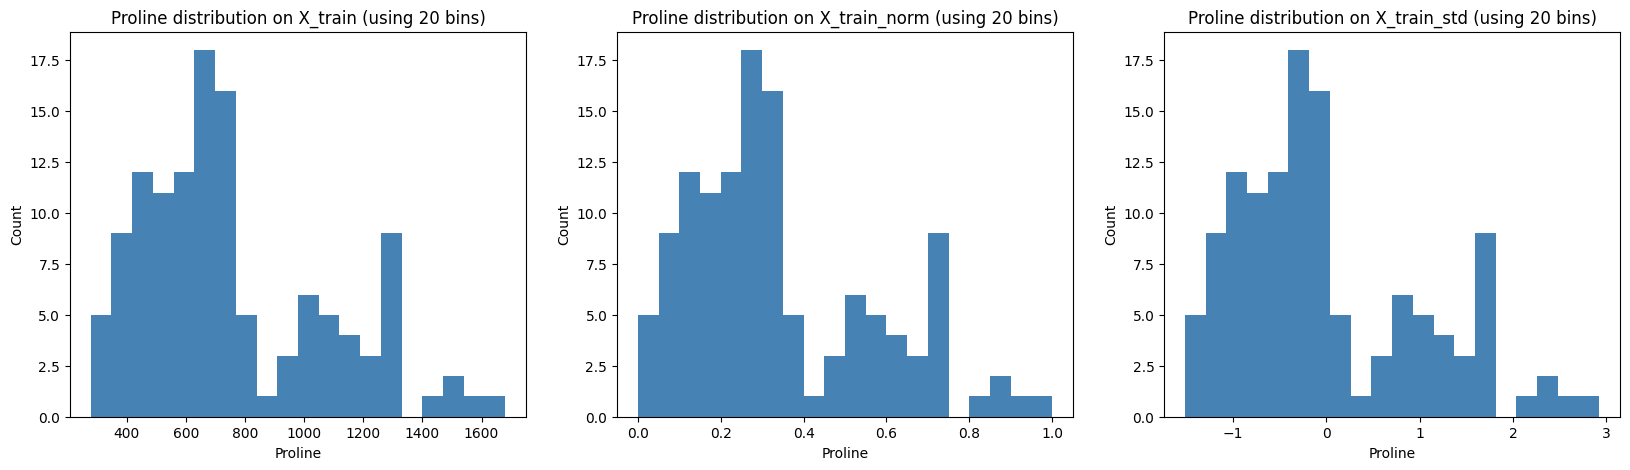

In [32]:
from sklearn.datasets import load_wine
data = load_wine(as_frame=True) 
df = data['data']
df['class'] = data['target']
df.head()

import numpy as np 
import pandas as pd
for col in df.columns:
  if col == 'class': continue
  
  df.loc[df.sample(frac=0.05, random_state=0).index, col] = np.nan
print(df.isnull().sum())

df_dropna = df.dropna(axis=0)
print("Shape before dropping:", df.shape)
print("Shape after dropping:", df_dropna.shape)

df = df.fillna(df.mean())
pd.set_option("display.precision", 2)
df.head()

from sklearn.model_selection import train_test_split
X = df.drop("class", axis=1).values
y = df['class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

y_class_dist = np.unique(y, return_counts=True)[1] / y.shape[0] * 100 
y_train_class_dist = np.unique(y_train, return_counts=True)[1] / y_train.shape[0] * 100 
y_test_class_dist = np.unique(y_test, return_counts=True)[1] / y_test.shape[0] * 100
print("Class distribution before split: {:.2f}% {:.2f}% {:.2f}%".format(y_class_dist[0], y_class_dist[1], y_class_dist[2]))
print("Class distribution in training set: {:.2f}% {:.2f}% {:.2f}%".format(y_train_class_dist[0], y_train_class_dist[1], y_train_class_dist[2]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

y_class_dist = np.unique(y, return_counts=True)[1] / y.shape[0] * 100
y_train_class_dist = np.unique(y_train, return_counts=True)[1] / y_train.shape[0] * 100
y_test_class_dist = np.unique(y_test, return_counts=True)[1] / y_test.shape[0] * 100
print("Class distribution before split: {:.2f}% {:.2f}% {:.2f}%".format(y_class_dist[0], y_class_dist[1], y_class_dist[2]))
print("Class distribution in training set: {:.2f}% {:.2f}% {:.2f}%".format(y_train_class_dist[0], y_train_class_dist[1], y_train_class_dist[2]))
print("Class distribution in test set: {:.2f}% {:.2f}% {:.2f}%".format(y_test_class_dist[0], y_test_class_dist[1], y_test_class_dist[2]))

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
X_train_inversed = mms.inverse_transform(X_train_norm)
np.set_printoptions(precision=2, suppress=True)
print("Sample data before scaled: {}".format(X_train[0]))
print("Sample data after scaled: {}".format(X_train_norm[0]))
print("Sample scaled data after inversed: {}".format(X_train_inversed[0]))

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
X_train_inversed = stdsc.inverse_transform(X_train_std)
print("Sample data before scaled: {}".format(X_train[0]))
print("Sample data after scaled: {}".format(X_train_std[0]))
print("Sample scaled data after inversed: {}".format(X_train_inversed[0]))

import matplotlib.pyplot as plt
proline_norm = X_train_norm[:, 12]

# plt.hist(X_train[:,12], bins = 20, color = 'steelblue')
# plt.xlabel('Proline')
# plt.ylabel('Count')
# plt.title('Proline distribution on X_train (using 20 bins)')
# plt.show()
# plt.hist(proline_norm, bins = 20, color = 'steelblue')
# plt.xlabel('Proline')
# plt.ylabel('Count')
# plt.title('Proline distribution on X_train_norm (using 20 bins)')
# plt.show()
# plt.hist(X_train_std[:,12], bins = 20, color = 'steelblue')
# plt.xlabel('Proline')
# plt.ylabel('Count')
# plt.title('Proline distribution on X_train_std (using 20 bins)')
# plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 5))

ax1.hist(X_train[:, 12], bins=20, color='steelblue')
ax1.set(title='Proline distribution on X_train (using 20 bins)', xlabel='Proline', ylabel='Count')

ax2.hist(proline_norm, bins=20, color='steelblue')
ax2.set(title='Proline distribution on X_train_norm (using 20 bins)', xlabel='Proline', ylabel='Count')

ax3.hist(X_train_std[:,12], bins=20, color='steelblue')
ax3.set(title='Proline distribution on X_train_std (using 20 bins)', xlabel='Proline', ylabel='Count')
plt.show()